In [ ]:
#1. Background- Ensemble Learning is the process by which multiple models (classifiers or experts), are strategically generated 
#and combined. When combined they provide a solution to a particular computational intelligence problem.
#It is primarily used to improve the performance of a model, or reduce the likelihood of an unfortunate 
# selection of a poor one.

In [ ]:
#2. Problem Statement- 
#Property Hall is a Canadian real estate company that facilitates a transaction between the buyers and sellers of property.
#The company's revenue is down for the past three months and they want to identify its root cause.
#They are looking for an automatic way to detect unusual behavior in their revenue.
#The company already has access to the data of houses in the city of Windsor.
#The unusual behaviour need to be identified

In [68]:
#3. Installing and Importing Libraries

#Installing Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
#!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance 

In [65]:
#Upgrading Libraries
#!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

In [197]:
#Importing Libraries
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#--------------------------------------------------------------------------------------------------------------------

import numpy as np                                                  # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

#---------------------------------------------------------------------------------------------------------------------\
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
#from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model

#---------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import StackingClassifier

#---------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


In [ ]:
#4. Data Acquisition and Description

#The dataset is based on real estate provided by Property Hall.

#Id	Features	Description
#01	price	Sale price of a house.
#02	lotsize	The lot size of a property in square feet.
#03	bedrooms	Number of bedrooms.
#04	bathrms	Number of bathrooms.
#05	stories	Number of stories excluding basement.
#06	driveway	Does the house has a driveway?
#07	recroom	Does the house has a recreational room?
#08	fullbase	Does the house has a full finished basement?
#09	gashw	Does the house uses gas for hot water heating?
#10	airco	Does the house has central air conditioning?
#11	garagepl	Number of garage places.
#12	prefarea	Is the house located in the preferred neighbourhood of the city?


In [198]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv')

data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.00,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.00,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.00,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.00,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.00,6360,2,1,1,yes,no,no,no,no,0,no


In [199]:
data.shape

(546, 12)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [201]:
data.describe()

#The data for variable price of house, lotsize of the property are skewed as the value of mean and the 
# value at 50% of the houses are different

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.00,546.00,546.00,546.00,546.00,546.00
mean,68121.60,5150.27,2.97,1.29,1.81,0.69
std,26702.67,2168.16,0.74,0.50,0.87,0.86
min,25000.00,1650.00,1.00,1.00,1.00,0.00
25%,49125.00,3600.00,2.00,1.00,1.00,0.00
50%,62000.00,4600.00,3.00,1.00,2.00,0.00
75%,82000.00,6360.00,3.00,2.00,2.00,1.00
max,190000.00,16200.00,6.00,4.00,4.00,3.00


In [27]:
#5. Data Pre-processing

#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')


In [202]:
#checking duplicates

data.isnull().duplicated().sum()

545

In [203]:
data.drop_duplicates(inplace=True)

In [204]:
data.shape

(545, 12)

In [ ]:
#6. Exploratory Data Analysis

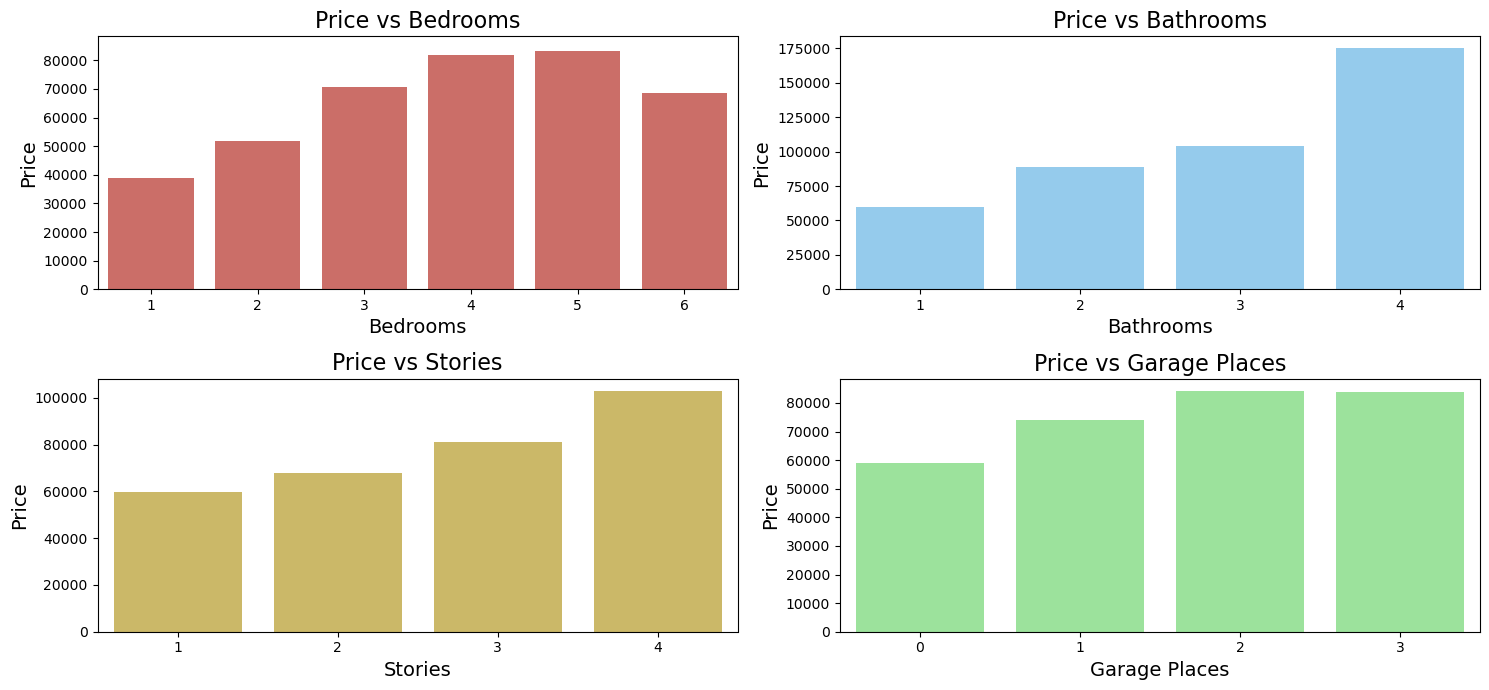

In [134]:
#Association of bedrooms, bathrooms, stories, and garage place concerning price

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'red']
figure = plt.figure(figsize = [15, 7])

# Price vs Bedrooms
plt.subplot(2, 2, 1)
sns.barplot(x='bedrooms', y='price', data=data, color='#DB5F57', ci=False)
plt.xlabel('Bedrooms', size = 14)
plt.ylabel('Price', size = 14)
plt.title('Price vs Bedrooms', size = 16)

# Price vs bathrooms
plt.subplot(2, 2, 2)
sns.barplot(x='bathrms', y='price', data=data, color='lightskyblue', ci=False)
plt.xlabel('Bathrooms', size = 14)
plt.ylabel('Price', size = 14)
plt.title('Price vs Bathrooms', size = 16)

# Price vs stories
plt.subplot(2, 2, 3)
sns.barplot(x='stories', y='price', data=data, color='#DBC257', ci=False)
plt.xlabel('Stories', size = 14)
plt.ylabel('Price', size = 14)
plt.title('Price vs Stories', size = 16)

# Price vs garagepl
plt.subplot(2, 2, 4)
sns.barplot(x='garagepl', y='price', data=data, color='lightgreen', ci=False)
plt.xlabel('Garage Places', size = 14)
plt.ylabel('Price', size = 14)
plt.title('Price vs Garage Places', size = 16)
plt.tight_layout()
plt.show()

#The price increases with increase in bathrooms, stories, garage place and bedrooms(except for 6 bedrooms
#when it decreases.)

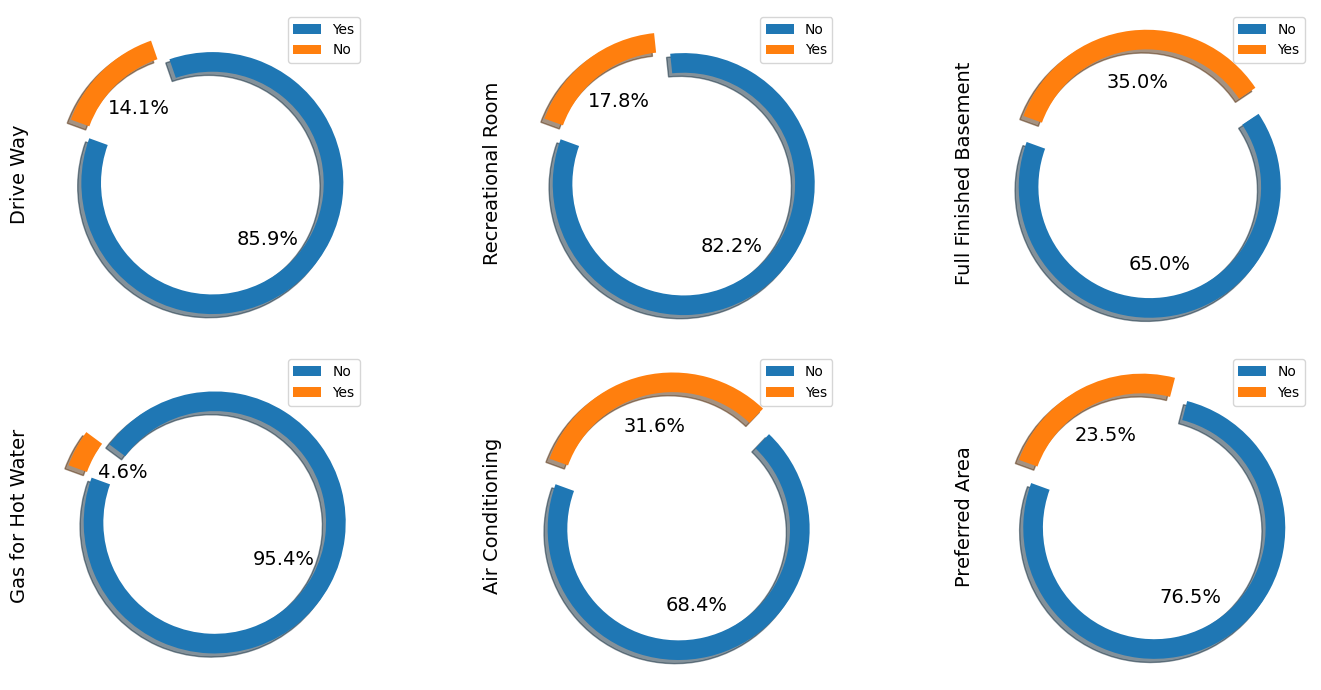

In [135]:
#Checking the proportion of the variables:- drive way, recreational room, full finished basement, gas hot water, air conditioning, 
#preferred area

# Subplot for Drive Way
plt.subplot(2, 3, 1)
space = np.ones(2)/10
data['driveway'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['Yes', 'No'])
plt.ylabel('Drive Way', size = 14)

# Subplot for recreational room
plt.subplot(2, 3, 2)
space = np.ones(2)/10
data['recroom'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['No', 'Yes'])
plt.ylabel('Recreational Room', size = 14)

# Subplot for full finished basement
plt.subplot(2, 3, 3)
space = np.ones(2)/10
data['fullbase'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['No', 'Yes'])
plt.ylabel('Full Finished Basement', size = 14)

# Subplot for gas for hot water heating
plt.subplot(2, 3, 4)
space = np.ones(2)/10
data['gashw'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['No', 'Yes'])
plt.ylabel('Gas for Hot Water', size = 14)

# Subplot for air conditioning
plt.subplot(2, 3, 5)
space = np.ones(2)/10
data['airco'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['No', 'Yes'])
plt.ylabel('Air Conditioning', size = 14)

# Subplot for preferred area
plt.subplot(2, 3, 6)
space = np.ones(2)/10
data['prefarea'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7], 
                                           legend=True, labels=['', ''])
plt.legend(['No', 'Yes'])
plt.ylabel('Preferred Area', size = 14)
plt.tight_layout()
plt.show()

#Fully furnished basement is available for 35% of the apartments, while only 4.6% of them had gas for hot water.

In [ ]:
#7.Post Data Processing and Feature selection

# In this section, we will perform transformation of categorical features to numeric using get_dummies().
#We can observe that features such as driveway, recroom, fullbase, gashw, airco, prefarea are having binary values.

In [205]:
data = pd.get_dummies(data=data, columns=['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'])

data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,42000.00,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0
1,38500.00,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,49500.00,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,60500.00,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0
4,61000.00,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0


In [ ]:
#Before diving further, we will create a categorical feature using the price feature.
#We will be performing ensemble methods on classes instead of numerical values

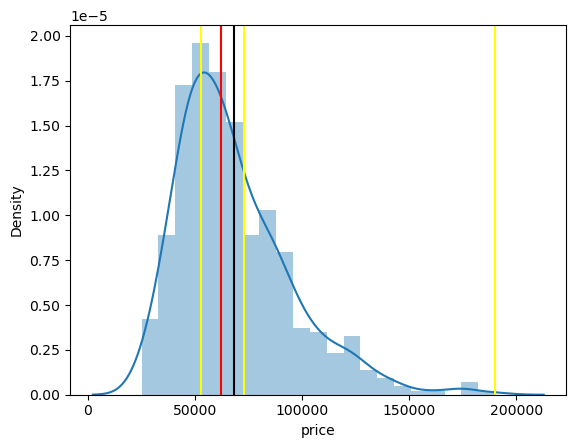

In [137]:
sns.distplot(data['price'])
plt.axvline(data.price.mean(),color='black')
plt.axvline(data.price.quantile(0.33), color='yellow')
plt.axvline(data.price.quantile(0.66), color='yellow')
plt.axvline(data.price.quantile(1.0), color='yellow')
plt.axvline(data.price.median(), color='red')
plt.show()

#The price behind fist yellow line is low price, next is medium price and  area between second & last line
#is high price

In [138]:
q1= data.price.quantile(0.33)
q2= data.price.quantile(0.66)
q3= data.price.quantile(1.0)
print(q1, q2, q3)

52900.0 73000.0 190000.0


In [206]:
#making new variable for price

data['price_cat'] = pd.cut(data.price, bins=[0,q1, q2, q3], labels=['Low', 'Medium', 'High'])

data.price_cat.value_counts()



High      184
Low       181
Medium    180
Name: price_cat, dtype: int64

In [207]:
data.info()

#We see that the frequency distribution of the price feature is approx. normal.
#In such case, we can rely on accuracy as a metric to evaluate our model.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 545
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   price         545 non-null    float64 
 1   lotsize       545 non-null    int64   
 2   bedrooms      545 non-null    int64   
 3   bathrms       545 non-null    int64   
 4   stories       545 non-null    int64   
 5   garagepl      545 non-null    int64   
 6   driveway_no   545 non-null    uint8   
 7   driveway_yes  545 non-null    uint8   
 8   recroom_no    545 non-null    uint8   
 9   recroom_yes   545 non-null    uint8   
 10  fullbase_no   545 non-null    uint8   
 11  fullbase_yes  545 non-null    uint8   
 12  gashw_no      545 non-null    uint8   
 13  gashw_yes     545 non-null    uint8   
 14  airco_no      545 non-null    uint8   
 15  airco_yes     545 non-null    uint8   
 16  prefarea_no   545 non-null    uint8   
 17  prefarea_yes  545 non-null    uint8   
 18  price_cat 

In [208]:
#dropping the variable price

data.drop(['price'], axis=1, inplace=True)

In [209]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes,price_cat
0,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0,Low
1,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Low
2,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Low
3,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0,Medium
4,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,Medium


In [ ]:
#7.2 Feature Selection

#we analyze the impact of input feature values over the target feature values.
#It is either done by performing statistical tests (Pearson, ANOVA, Chi-Square) or by using Random Forest.
#Random forests are one of the most popular machine learning algorithms.
#The provide a good predictive performance, low overfitting, and easy interpretability.
#This interpretability is derived from the importance of each feature on the tree decision evaluated the reduction in impurity.
#In other words, it is easy to compute how much each feature is contributing to the decision.
#We will implement SelectFromModel() available in Sklearn which uses the base estimator to identify important features.
#The importance of a feature is determined based on threshold (a measure to calculate feature importance).

#To read

#https://www.datatechnotes.com/2021/04/selectfrommodel-feature-selection.html
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [210]:
# Splitting data to dependent and independent variables

X = data.drop('price_cat', axis = 1)
y = data['price_cat']

In [145]:
X.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_no,driveway_yes,recroom_no,recroom_yes,fullbase_no,fullbase_yes,gashw_no,gashw_yes,airco_no,airco_yes,prefarea_no,prefarea_yes
0,5850,3,1,2,1,0,1,1,0,0,1,1,0,1,0,1,0
1,4000,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,3060,3,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
3,6650,3,1,2,0,0,1,0,1,1,0,1,0,1,0,1,0
4,6360,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0


In [211]:
y.head()

0       Low
1       Low
2       Low
3    Medium
4    Medium
Name: price_cat, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [212]:
# 7.3 Ensemble Learning- 

#7.3.1 Bagging e.g. Randomforest- It buidls several instances of blackbox estimator on random subset of original training data.
#It aggregate their individual prediction to build a final prediction.

# Calling the estimator 

est = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

#Calling the selector command- for feature selection in the model
selector = SelectFromModel(estimator=est)

#Fitting on dataset
selector.fit(X,y)

#-1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all 
#the CPUs available in the local computer.

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=42))

In [213]:
#7.3.1.2 extracting list of important features- 

from sklearn.feature_selection import SelectFromModel 

selector_feat = X.columns[(selector.get_support())].tolist()

# Show the number of important features selected by model
print('Total features selected are: ',len(selector_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by model:', np.round(selector.threshold_, decimals=2))
print('Important Features:', selector_feat)


Total features selected are:  5
Threshold set by model: 0.06
Important Features: ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']


In [189]:
selector.estimator

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
#https://www.scikit-yb.org/en/latest/quickstart.html

#https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

In [154]:
#7.3.1.3- Other method of feature selection

from yellowbrick.model_selection import FeatureImportances

#calling the featureimportances 
fi = FeatureImportances(selector.estimator)
#fitting on dataset
fi.fit(X,y)
plt.xlabel("Feature Importances")
plt.ylabel("Importances")
plt.show()


ModuleNotFoundError: No module named 'yellowbrick'

In [72]:
##7.3.1.3 Third method of feature selection RFE- Recursive Feature Elimination

In [155]:
#Recursive Feature Elimination offers a compelling solution, and RFE iteratively removes less important 
#features, creating a subset that maximizes predictive accuracy.

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression


In [156]:
#rfe_selector = RFE(estimator=LogisticRegression(),
                  n_features_to_select=5,
                  step=1)

#rfe_selector.fit(X,y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [157]:
#rfe_selector.get_support()

array([False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True])

In [158]:
#X.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_no',
       'driveway_yes', 'recroom_no', 'recroom_yes', 'fullbase_no',
       'fullbase_yes', 'gashw_no', 'gashw_yes', 'airco_no', 'airco_yes',
       'prefarea_no', 'prefarea_yes'],
      dtype='object')

In [159]:
#rfe_selector.ranking_

array([13,  5,  1, 10,  9,  3,  1,  2,  8, 11, 12,  1,  7,  1,  4,  6,  1])

In [160]:
#list(X.columns)

['lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'garagepl',
 'driveway_no',
 'driveway_yes',
 'recroom_no',
 'recroom_yes',
 'fullbase_no',
 'fullbase_yes',
 'gashw_no',
 'gashw_yes',
 'airco_no',
 'airco_yes',
 'prefarea_no',
 'prefarea_yes']

In [161]:
#selected_features_rfe= X.columns[rfe_selector.support_].to_list()

#selected_features_rfe

['bathrms', 'driveway_yes', 'gashw_no', 'airco_no', 'prefarea_yes']

In [80]:
#X.shape

(545, 17)

In [190]:
#7.4 Splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

In [191]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((436, 17), (436,), (109, 17), (109,))

In [ ]:
#8. Model Developmemnt and Evaluation

#In this section we will develop variety of models such as:
#Logistic Regression	Decision Tree	Random Forest	Adaptive Boosting	Gradient Boosting	Voting Classifier
#For estimating the performance of the model we will be using accuracy as a metric.
#Considering the complexity of data, we can run a loop over multiple classifiers and estimate the accuracy of the model.
#In real world, one model should be run at a time to see the performance

In [192]:
#8.1 #Initialize Classifier

log_clf= LogisticRegression(random_state=42, class_weight='balanced')
sv_clf= SVC(random_state=42, class_weight='balanced',probability=True)
dt_clf= DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced',n_jobs=-1)
bag_clf= BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf',rf_clf),('dt', dt_clf),('svc', sv_clf)], voting='soft')
ada_clf= AdaBoostClassifier(base_estimator=dt_clf,n_estimators=500,random_state=42)
gb_clf= GradientBoostingClassifier(n_estimators=500,random_state=42)

In [193]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')


Success!
CPU times: user 1.95 s, sys: 368 ms, total: 2.32 s
Wall time: 3.23 s


In [194]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

#Observation

#In all the models the difference in train and test accuracy is more than 5%, other than SVC.
#This may be due to the small sample of the dataset

,LogisticRegression,SVC,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train Accuracy,0.70,0.57,0.99,0.99,0.99,0.99,0.99,0.99
Test Accuracy,0.60,0.55,0.66,0.65,0.66,0.61,0.56,0.60


In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
    

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
#8.2 Stacking- method of combining estimators to reduce biases


#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


#In this section we will develop stacking classifier with the help of different estimators such as:
#Logistic Regression
#Support Vector Classifier
#K Nearest Neighbor Classifier
#Random Forest Classifier
#Gradient Boosting Classifier
#For estimating the performance of the model we will be using accuracy as a metric.

In [214]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))           

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy on Train data: 0.89
Accuracy on Test data: 0.61
CPU times: user 410 ms, sys: 510 ms, total: 919 ms
Wall time: 2 s


In [ ]:
#The project is still trying to give best model using Stacking. Final Model is awaited